# The Power of Matrix Computation

In this section we want to see what we can do with matrix multiplication. You will apply matrix multiplication to a set of data points to scale, translate and rotate data points.

### Generating points

First we need to generate the onput points. We will generate a grid of 5x5 points.

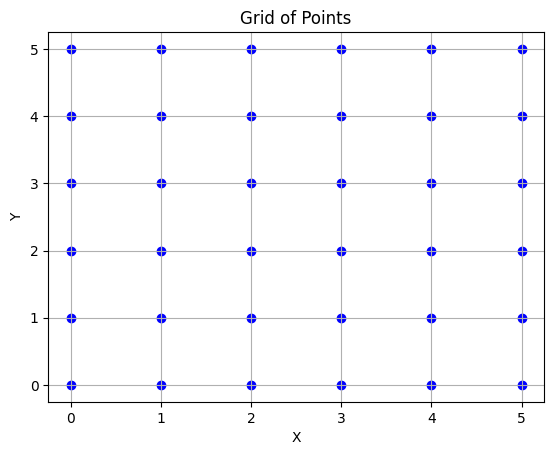

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the grid points
x = np.linspace(0, 5, 6)  # x-coordinates
y = np.linspace(0, 5, 6)  # y-coordinates
X, Y = np.meshgrid(x, y)  # Create a grid of x and y coordinates

# Flatten the grid points into 1D arrays
X_flat = X.flatten()
Y_flat = Y.flatten()

# Plot the grid points
plt.scatter(X_flat, Y_flat, color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Grid of Points')
plt.grid(True)
plt.show()

## Translation

Let's see how we can translate points (move them into x- and y-direction)

In this code, we first generate the grid points as before. Then, we define the translation amounts (tx and ty) as 2 and 1 respectively, indicating a translation of 2 units in the x direction and 1 unit in the y direction.
Next, we create the translation matrix using NumPy. The translation matrix is a 3x3 matrix where the top-left 2x2 submatrix is the identity matrix, and the last column represents the translation amounts.
We then add a column of ones to the grid points to account for the homogeneous coordinates, and stack the x, y, and ones arrays together to form the points array.
The translation matrix is applied to the points by performing matrix multiplication using the np.dot function. The resulting transformed points are extracted and stored in X_transformed and Y_transformed.
Finally, we plot both the original and transformed points using plt.scatter, specifying different colors for each set of points. The rest of the code is similar to the previous example, with labels, title, legend, and grid added to the plot.
When you run this updated code, it will generate a scatter plot showing both the original grid points (in blue) and the transformed points after the translation (in red). The transformed points will be shifted by 2 units in the x direction and 1 unit in the y direction relative to the original points.

$$
\begin{pmatrix} p_x' & p_y' & 1 \end{pmatrix} = \begin{pmatrix} p_x & p_y & 1 \end{pmatrix} \cdot \begin{pmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{pmatrix}
$$

**Your task:**
- Fill the missing matrix values
- Check what happens if you change the values of $t_x$ and $t_y$
- Which values do $t_x$ and $t_y$ need to have when you want the move the points by two to the left and one to the top?

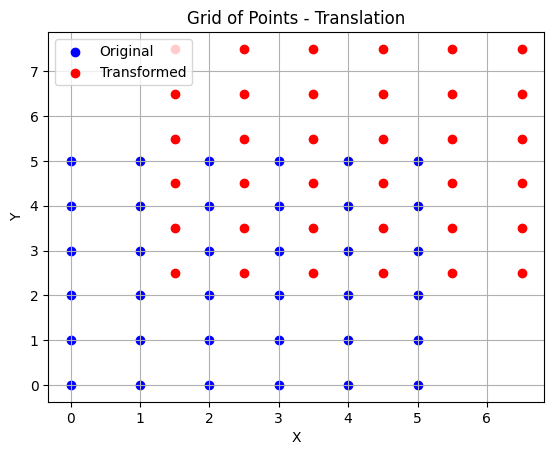

In [2]:
# Define the translation amounts
tx = ___  # Translation in x direction
ty = ___  # Translation in y direction

# Create the translation matrix
def get_translation_matrix(tx, ty):
    return np.array([[_, _, _],
                    [_, _, _],
                    [_, _, _]])

def translation(x, y, tx, ty):
    # Add a column of ones to the grid points
    ones = np.ones_like(x)
    points = np.column_stack((x, y, ones))

    # Apply the translation matrix to the points
    translation_matrix = get_translation_matrix(tx, ty)
    transformed_points = np.dot(translation_matrix, points.T).T

    # Extract the transformed x and y coordinates
    X_transformed = transformed_points[:, 0]
    Y_transformed = transformed_points[:, 1]

    return X_transformed, Y_transformed

X_transformed, Y_transformed = translation(X_flat, Y_flat, tx, ty)

# Plot the original and transformed points
plt.scatter(X_flat, Y_flat, color='blue', label='Original')
plt.scatter(X_transformed, Y_transformed, color='red', label='Transformed')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Grid of Points - Translation')
plt.legend()
plt.grid(True)
plt.show()

## Scaling

Now let's see how we can scale data points using matrix multiplication. Mathematically scaling looks like this:

$$
\begin{pmatrix} p_x' & p_y' \end{pmatrix} = \begin{pmatrix} p_x & p_y \end{pmatrix} \cdot \begin{pmatrix} s_x & 0 \\ 0 & s_y \end{pmatrix} = \begin{pmatrix} p_x \cdot s_x & 0 \\ 0 & p_x \cdot s_y \end{pmatrix}
$$

In this code, we first generate the grid points as before. Then, we define the translation amounts (tx and ty) as 2 and 1 respectively, indicating a translation of 2 units in the x direction and 1 unit in the y direction.
Next, we create the translation matrix using NumPy. The translation matrix is a 3x3 matrix where the top-left 2x2 submatrix is the identity matrix, and the last column represents the translation amounts.
We then add a column of ones to the grid points to account for the homogeneous coordinates, and stack the x, y, and ones arrays together to form the points array.
The translation matrix is applied to the points by performing matrix multiplication using the np.dot function. The resulting transformed points are extracted and stored in X_transformed and Y_transformed.
Finally, we plot both the original and transformed points using plt.scatter, specifying different colors for each set of points. The rest of the code is similar to the previous example, with labels, title, legend, and grid added to the plot.
When you run this updated code, it will generate a scatter plot showing both the original grid points (in blue) and the transformed points after the translation (in red). The transformed points will be shifted by 2 units in the x direction and 1 unit in the y direction relative to the original points.

Your task:
- Fill the missing values of the scaling matrix so that the data points get scaled by a factor of 2

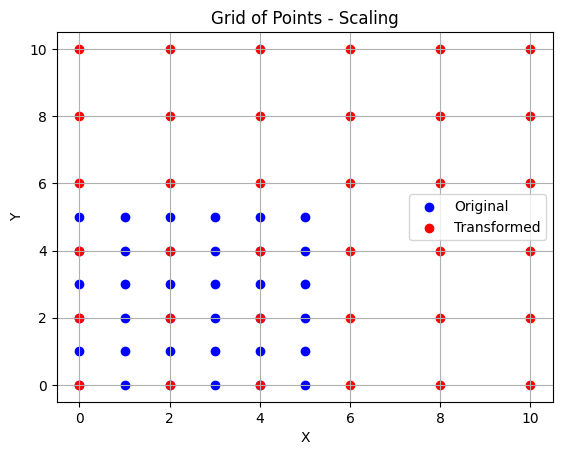

In [3]:
# Define the scaling factors
sx = _  # Scaling factor in x direction
sy = _  # Scaling factor in y direction

# Create the scaling matrix
def get_scaling_matrix(sx, sy):
    return np.array([[_, _],
                    [_, _]])

scaling_matrix = get_scaling_matrix(_, _)

# Combine the x and y coordinates into a single array
points = np.column_stack((X_flat, Y_flat))

# Apply the scaling matrix to the points
transformed_points = np.dot(points, scaling_matrix)

# Extract the transformed x and y coordinates
X_transformed = transformed_points[:, 0]
Y_transformed = transformed_points[:, 1]

# Plot the original and transformed points
plt.scatter(X_flat, Y_flat, color='blue', label='Original')
plt.scatter(X_transformed, Y_transformed, color='red', label='Transformed')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Grid of Points - Scaling')
plt.legend()
plt.grid(True)
plt.show()

## Rotation

We can also rotate points using matrix multiplication. A rotation looks like this:

$$
\begin{pmatrix} p_x' & p_y' \end{pmatrix} = \begin{pmatrix} p_x & p_y \end{pmatrix} \cdot \begin{pmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{pmatrix} = \begin{pmatrix} p_x \cdot \cos(\theta) + p_y \cdot \sin(\theta) & p_x \cdot -\sin(\theta) + p_y \cdot \cos(\theta) \end{pmatrix}
$$

Theta is the degree in radial dimension. For example 90° in radial dimension is $0.5\pi$, 180° is $\pi$, 270° is $1.5\pi$ and 360° is $2\pi$.

In this code, we first generate the grid points as before. Then, we define the scaling factors (sx and sy) as 2, indicating a scaling factor of 2 in both the x and y directions.
Next, we create the scaling matrix using NumPy. The scaling matrix is a 2x2 matrix where the diagonal elements represent the scaling factors, and the off-diagonal elements are zeros.
The x and y coordinates are combined into a single array called points using np.column_stack.
The scaling matrix is applied to the points by performing matrix multiplication using the np.dot function. The resulting transformed points are extracted and stored in X_transformed and Y_transformed.
Finally, we plot both the original grid points (in blue) and the transformed points after the scaling (in red). The transformed points will be scaled by a factor of 2 in both the x and y directions relative to the original points. The rest of the code is similar to the previous examples, with labels, title, legend, and grid added to the plot.

Your task:
- Fill the missing values for the rotation matrix so that the data points get rotated by 45 degrees to the left


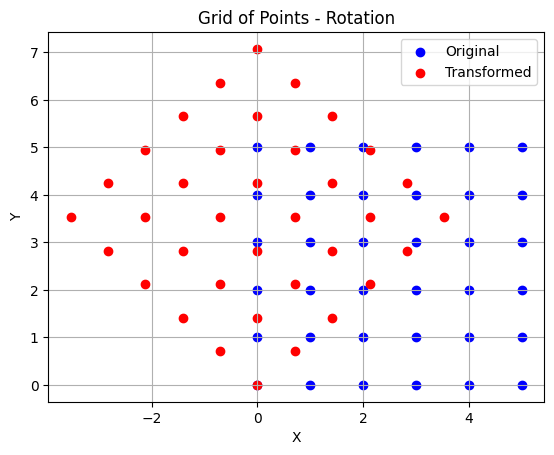

In [4]:
# Create the rotation matrix
def get_rotation_matrix(theta):
    return np.array([[_, _],
                    [_, _]])

rotation_matrix = get_rotation_matrix(np.radians(_))

# Combine the x and y coordinates into a single array
points = np.column_stack((X_flat, Y_flat))

# Apply the rotation matrix to the points
transformed_points = points @ rotation_matrix

# Extract the transformed x and y coordinates
X_transformed = transformed_points[:, 0]
Y_transformed = transformed_points[:, 1]

# Plot the original and transformed points
plt.scatter(X_flat, Y_flat, color='blue', label='Original')
plt.scatter(X_transformed, Y_transformed, color='red', label='Transformed')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Grid of Points - Rotation')
plt.legend()
plt.grid(True)
plt.show()

## Shearing

In this sample we will shear data points. Mathematically this operation looks like this:

$$
\begin{pmatrix} p_x' & p_y' \end{pmatrix} = \begin{pmatrix} p_x & p_y \end{pmatrix} \cdot \begin{pmatrix} 1 & s_x \\ s_y & 1 \end{pmatrix} = \begin{pmatrix} p_x + p_y \cdot s_x & p_x \cdot s_y \end{pmatrix}
$$

In this code, we first generate the grid points as before. Then, we define the rotation angle as 45 degrees, which is converted to radians using np.radians.
Next, we create the rotation matrix using NumPy. The rotation matrix is a 2x2 matrix where the elements are computed using the cosine and sine of the rotation angle.
The x and y coordinates are combined into a single array called points using np.column_stack.
The rotation matrix is applied to the points by performing matrix multiplication using the np.dot function. The resulting transformed points are extracted and stored in X_transformed and Y_transformed.
Finally, we plot both the original grid points (in blue) and the transformed points after the rotation (in red). The transformed points will be rotated by 45 degrees compared to the original points. The rest of the code is similar to the previous examples, with labels, title, legend, and grid added to the plot.
When you run this updated code, it will generate a scatter plot showing both the original grid points and the transformed points after the rotation operation. The transformed points will be rotated by 45 degrees compared to the original points.

Your task:
- Fill the missing values for the shearing matrix

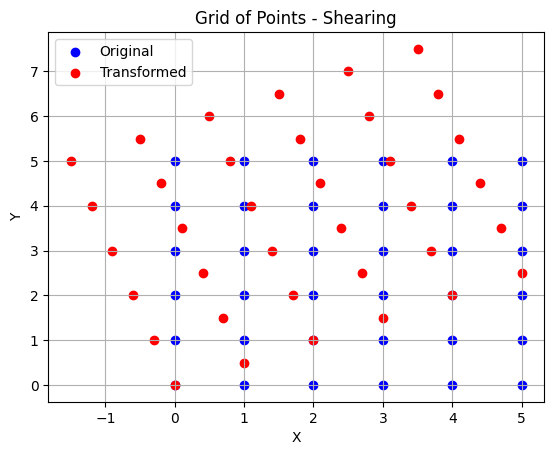

In [5]:
# Define the shearing factors
shx = ___  # Shearing factor in the x direction
shy = ___  # Shearing factor in the y direction

# Create the shearing matrix
shearing_matrix = np.array([[_, _],
                            [_, _]])

# Combine the x and y coordinates into a single array
points = np.column_stack((X_flat, Y_flat))

# Apply the shearing matrix to the points
transformed_points = np.dot(points, shearing_matrix)

# Extract the transformed x and y coordinates
X_transformed = transformed_points[:, 0]
Y_transformed = transformed_points[:, 1]

# Plot the original and transformed points
plt.scatter(X_flat, Y_flat, color='blue', label='Original')
plt.scatter(X_transformed, Y_transformed, color='red', label='Transformed')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Grid of Points - Shearing')
plt.legend()
plt.grid(True)
plt.show()

## Reflection

Another operation we can do with matrices is called relection. This works like a mirror where the data points are replected on to another location. Mathematically this looks like this:

Reflection on the x-axis:

$$
\begin{pmatrix} p_x' & p_y' \end{pmatrix} = \begin{pmatrix} p_x & p_y \end{pmatrix} \cdot \begin{pmatrix} -1 & 0 \\ 0 & 1 \end{pmatrix} = \begin{pmatrix} -p_x & p_y \end{pmatrix}
$$

Reflection on the y-axis:

$$
\begin{pmatrix} p_x' & p_y' \end{pmatrix} = \begin{pmatrix} p_x & p_y \end{pmatrix} \cdot \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} = \begin{pmatrix} p_x & -p_y \end{pmatrix}
$$

Reflecting points on the diagonal axis is the same as first reflecting them on the x-axis and then reflecting them on the y-axis. Mathematically we can express this by multiplying both matrices and get a new matrix that reflects points on the diagonal.


Building a new operation by multiplying the matrices of two operations:

$$
\begin{pmatrix} -1 & 0 \\ 0 & 1 \end{pmatrix} \cdot \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} =
\begin{pmatrix} -1 & 0 \\ 0 & -1 \end{pmatrix}
$$

$$
\begin{pmatrix} p_x' & p_y' \end{pmatrix} = \begin{pmatrix} p_x & p_y \end{pmatrix} \cdot \begin{pmatrix} -1 & 0 \\ 0 & -1 \end{pmatrix} = \begin{pmatrix} -p_x & -p_y \end{pmatrix}
$$

In this code, we first generate the grid points as before. Then, we define the shearing factors (shx and shy) as 0.5 and -0.3 respectively, indicating a shearing factor of 0.5 in the x direction and -0.3 in the y direction.
Next, we create the shearing matrix using NumPy. The shearing matrix is a 2x2 matrix where the off-diagonal elements represent the shearing factors, and the diagonal elements are ones.
The x and y coordinates are combined into a single array called points using np.column_stack.
The shearing matrix is applied to the points by performing matrix multiplication using the np.dot function. The resulting transformed points are extracted and stored in X_transformed and Y_transformed.
Finally, we plot both the original grid points (in blue) and the transformed points after the shearing operation (in red). The transformed points will be sheared by the specified factors in the x and y directions relative to the original points. The rest of the code is similar to the previous examples, with labels, title, legend, and grid added to the plot.
When you run this updated code, it will generate a scatter plot showing both the original grid points and the transformed points after the shearing operation. The transformed points will be sheared according to the specified factors in the x and y directions compared to the original points.

Your task:
- Build a projection matrix that reflects all data points along the y-axis

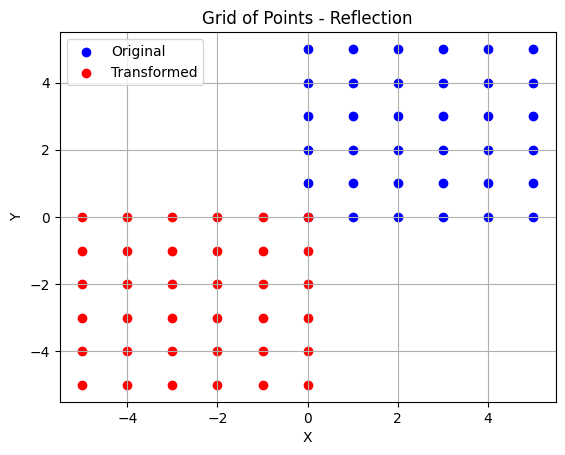

In [6]:
# Create the reflection matrix
reflection_matrix = _

# Combine the x and y coordinates into a single array
points = np.column_stack((X_flat, Y_flat))

# Apply the reflection matrix to the points
transformed_points = np.dot(points, reflection_matrix)

# Extract the transformed x and y coordinates
X_transformed = transformed_points[:, 0]
Y_transformed = transformed_points[:, 1]

# Plot the original and transformed points
plt.scatter(X_flat, Y_flat, color='blue', label='Original')
plt.scatter(X_transformed, Y_transformed, color='red', label='Transformed')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Grid of Points - Reflection')
plt.legend()
plt.grid(True)
plt.show()

## Projection

With matrices we can also increase or reduce the dimensionality of data points, which is a necessary feature if we want map data points to classes. If we have a vector of size $1 \times d$ and a matrix of size $d \times k$ then the result of multiplying the vector and the matrix will be a vector of size $1 \times k$. So by choosing the width $k$ of our matrix we can either increase or decrease the dimension of our data points. In this example we will map all of our two-dimensional data points to a line, which is one-dimensional.

In this code, we first generate the grid points as before. Then, we create the reflection matrix using NumPy. The reflection matrix is a 2x2 matrix where the first column is [-1, 0] and the second column is [0, 1]. This matrix reflects points along the y-axis by negating the x-coordinate while keeping the y-coordinate unchanged.
The x and y coordinates are combined into a single array called points using np.column_stack.
The reflection matrix is applied to the points by performing matrix multiplication using the np.dot function. The resulting transformed points are extracted and stored in X_transformed and Y_transformed.
Finally, we plot both the original grid points (in blue) and the transformed points after the reflection operation (in red). The transformed points will be reflected along the y-axis compared to the original points. The rest of the code is similar to the previous examples, with labels, title, legend, and grid added to the plot.

Your task:
- Fill the missing projection matrix so that all data points are projected to the first diagonal

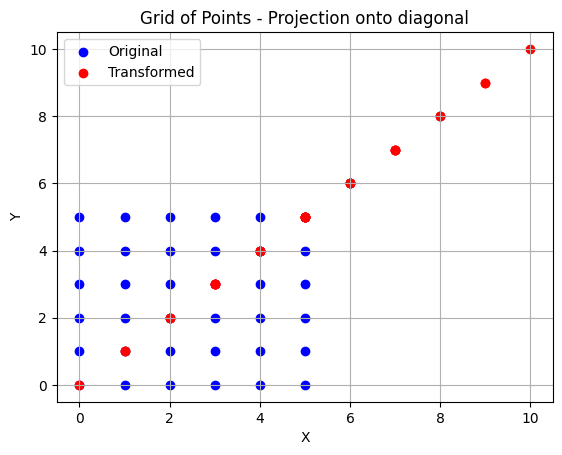

In [7]:
# Create the projection matrix
projection_matrix = _

# Combine the x and y coordinates into a single array
points = np.column_stack((X_flat, Y_flat))

# Apply the projection matrix to the points
transformed_points = np._(points, projection_matrix)

# Extract the transformed x and y coordinates
X_transformed = transformed_points[:, 0]
Y_transformed = transformed_points[:, 1]

# Plot the original and transformed points
plt.scatter(X_flat, Y_flat, color='blue', label='Original')
plt.scatter(X_transformed, Y_transformed, color='red', label='Transformed')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Grid of Points - Projection onto diagonal')
plt.legend()
plt.grid(True)
plt.show()

## Chaining multiple operations

In this code, we first generate the grid points as before. Then, we create the projection matrix using NumPy. The projection matrix is a 2x2 matrix where the first row is [1, 0] and the second row is [0, 0]. This matrix ensures that only the x-component of each vector is retained, while the y-component is discarded.
The x and y coordinates are combined into a single array called points using np.column_stack.
The projection matrix is applied to the points by performing matrix multiplication using the np.dot function. The resulting transformed points are extracted and stored in X_transformed and Y_transformed. In this case, the y-components of the transformed points will be zero.
Finally, we plot both the original grid points (in blue) and the transformed points after the projection operation (in red). The transformed points will be projected onto the x-axis, with the y-components set to zero. The rest of the code is similar to the previous examples, with labels, title, legend, and grid added to the plot.
When you run this updated code, it will generate a scatter plot showing both the original grid points and the transformed points after the projection operation. The transformed points will be projected onto the x-axis, with the y-components discarded.

Your task:
- Create a transformation matrix composed of a projection matrix and a rotation matrix
- Apply the transformation matrix to the data points

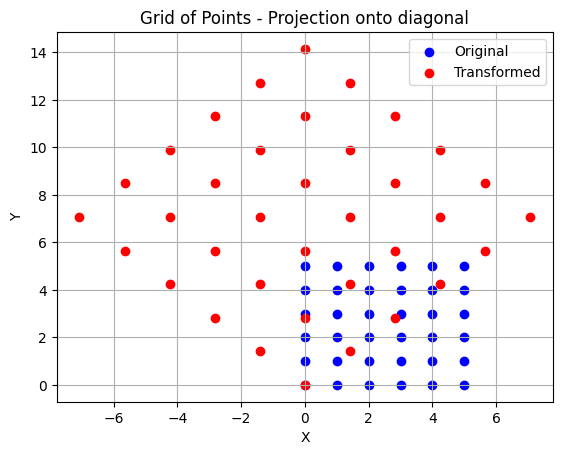

In [8]:
# Create the projection matrix by chaining a scaling and a rotation matrix
transformation_matrix = _ @ _

# Combine the x and y coordinates into a single array
points = np.column_stack((X_flat, Y_flat))

# Apply the projection matrix to the points
transformed_points = points @ _

# Extract the transformed x and y coordinates
X_transformed = transformed_points[:, 0]
Y_transformed = transformed_points[:, 1]

# Plot the original and transformed points
plt.scatter(X_flat, Y_flat, color='blue', label='Original')
plt.scatter(X_transformed, Y_transformed, color='red', label='Transformed')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Grid of Points - Projection onto diagonal')
plt.legend()
plt.grid(True)
plt.show()